Training and validation metrics from selected training runs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from mammo_utils import plot_metrics
%matplotlib inline

# 1.0.0.35 Family

### model_s1.0.0.35b.98 - best model

 - Model 1.0.0.29 with data scaled but not centered
 - With cross entropy weighted towards positive examples by 6
 - Trained on Dataset 9 for binary classification for 40 epochs
 - Online data augmentation for last 10 epochs

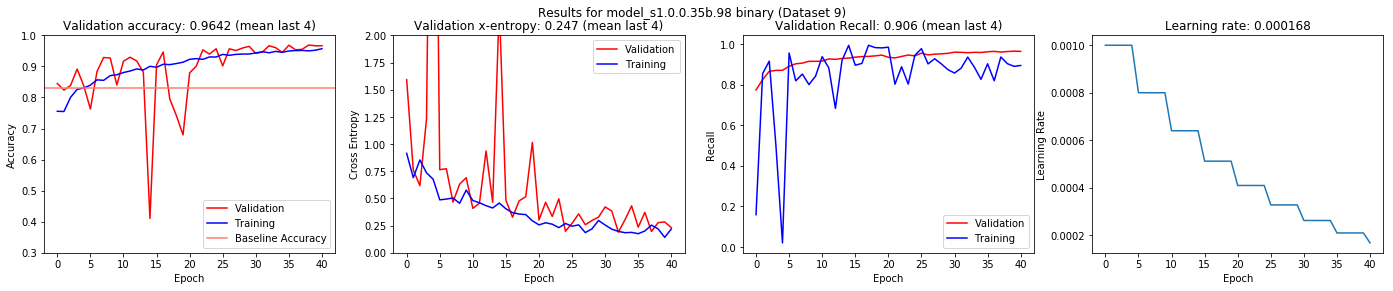

In [4]:
plot_metrics("model_s1.0.0.35b.98", classification="binary", dataset=9)

### model_s1.0.0.35b.96

 - Model 1.0.0.29 with data scaled but not centered
 - Trained on Dataset 9 for binary classification for 30 epochs
 - Centering the input data somehow seems to effect the validation data
 - Slightly different hyperparameters from 1.0.0.35b.98

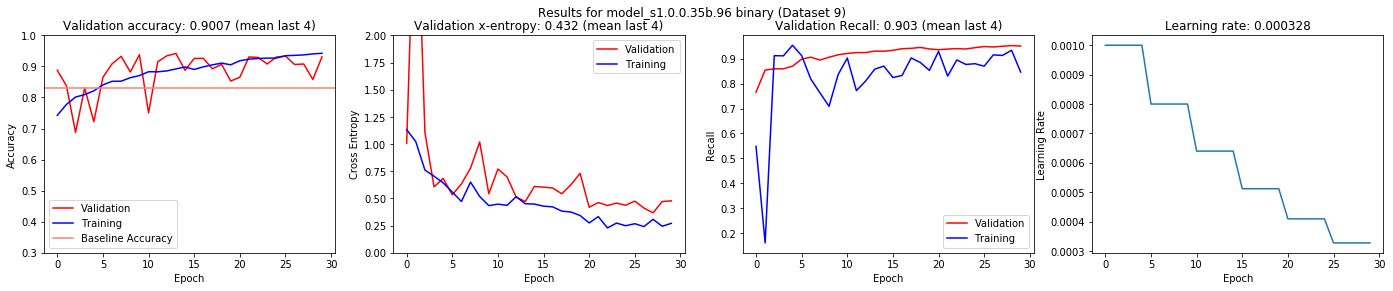

In [5]:
plot_metrics("model_s1.0.0.35b.96", classification="binary", dataset=9)

# 1.0.0.29 Family

The family of 1.0.0.29 models were the first ones created, and our methodology less rigorous at first than later on. Due to this, these results should be taken with a grain of salt.

## model_s1.0.0.29l.8.2

- Binary classification
- Trained from scratch on dataset 8 for 30 epochs
- Better performance than expected

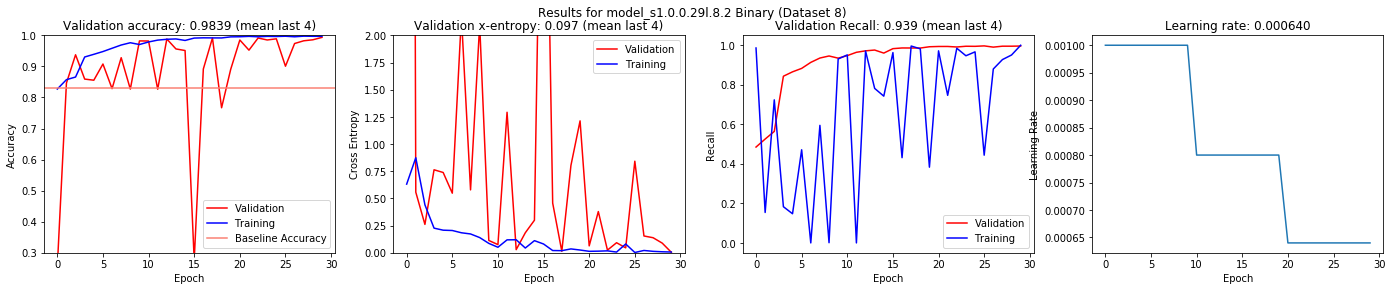

In [2]:
plot_metrics("model_s1.0.0.29l.8.2", classification="Binary", dataset=8)

## model_s1.0.0.29l.14

- Multi-class classification
- Trained on Dataset 6 from scratch for 30 epochs

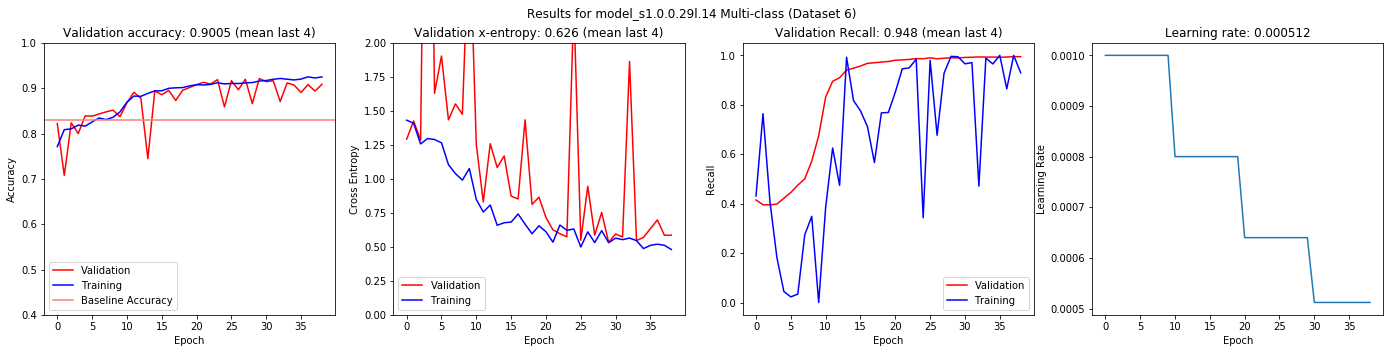

In [3]:
plot_metrics("model_s1.0.0.29l.14", classification="Multi-class", dataset=6)

# 1.0.0.45 Family

These were later versions of 1.0.0.29 which had the architecture largely unchanged, but the input data was scaled and centered, and there were some other superficial changes. By the time these models were trained our methodology was in place making these results more reliable than those of the 29 family.

## model_s1.0.0.45b.9.1

 - Binary classification
 - Trained on dataset 9 from scratch for 30 epochs
 - Validation accuracy began to drop after 15 epochs of training

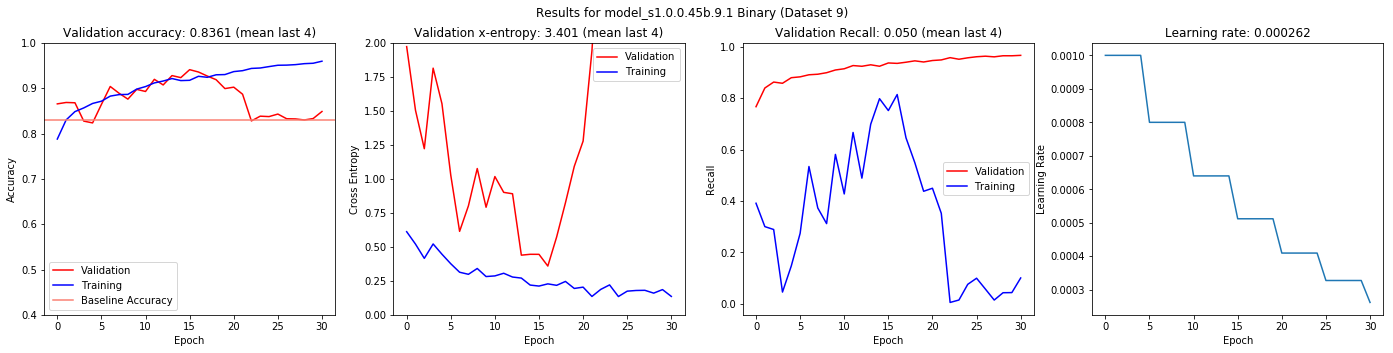

In [5]:
plot_metrics("model_s1.0.0.45b.9.1", classification="Binary", dataset=9)

## model_s1.0.0.46b8
 - Model trained for multi-class on dataset 8 for 20 epochs, then fully-connected layers retrained for binary for 5 epochs

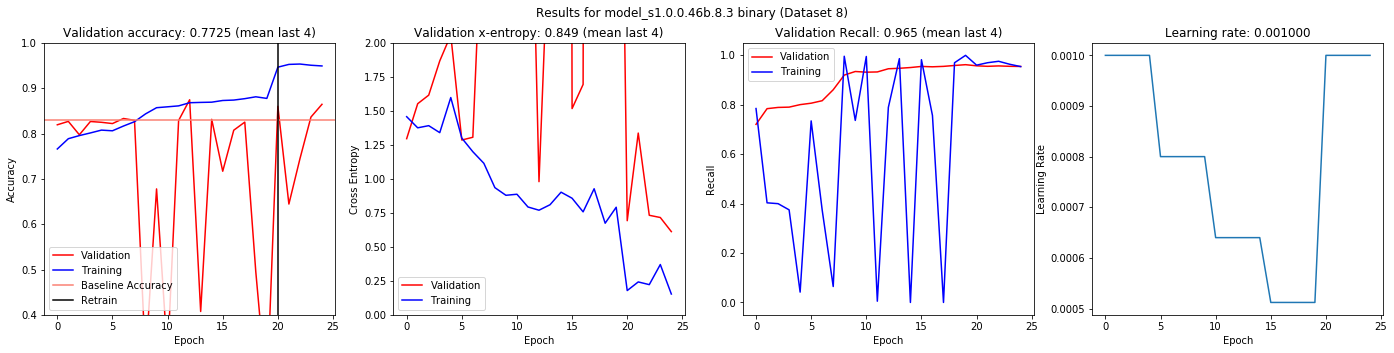

In [2]:
# we need to combine two sets of metrics here
def merge_arrays(dir_name, model_1, model_2, metric, save_name):
    array_1 = np.load(os.path.join("data", "results", dir_name, model_1 + metric + ".npy"))
    array_2 = np.load(os.path.join("data", "results", dir_name, model_2 + metric + ".npy"))[:5]
    
    save_array = np.concatenate([array_1, array_2], axis=0)
    
    np.save(os.path.join("data", "results", dir_name, save_name + metric + ".npy"), save_array)
    
merge_arrays("model_s1.0.0.46l.8.1", "model_s1.0.0.46l.8.1", "model_s1.0.0.46b.8.2", "cv_acc", "model_s1.0.0.46b.8.3")
merge_arrays("model_s1.0.0.46l.8.1", "model_s1.0.0.46l.8.1", "model_s1.0.0.46b.8.2", "cv_loss", "model_s1.0.0.46b.8.3")
merge_arrays("model_s1.0.0.46l.8.1", "model_s1.0.0.46l.8.1", "model_s1.0.0.46b.8.2", "cv_recall", "model_s1.0.0.46b.8.3")
merge_arrays("model_s1.0.0.46l.8.1", "model_s1.0.0.46l.8.1", "model_s1.0.0.46b.8.2", "train_acc", "model_s1.0.0.46b.8.3")
merge_arrays("model_s1.0.0.46l.8.1", "model_s1.0.0.46l.8.1", "model_s1.0.0.46b.8.2", "train_loss", "model_s1.0.0.46b.8.3")
merge_arrays("model_s1.0.0.46l.8.1", "model_s1.0.0.46l.8.1", "model_s1.0.0.46b.8.2", "train_lr", "model_s1.0.0.46b.8.3")
merge_arrays("model_s1.0.0.46l.8.1", "model_s1.0.0.46l.8.1", "model_s1.0.0.46b.8.2", "train_recall", "model_s1.0.0.46b.8.3")

# now plot the metrics
plot_metrics("model_s1.0.0.46b.8.3", classification="binary", dataset=8, model_dir="model_s1.0.0.46l.8.1", vline=20, vlabel="Retrain")    

## model_s1.0.0.46b.6

 - Trained on dataset 6 for binary classification for 20 epochs
 - Validation accuracy began to drop after epoch 10, then dropped while recall stayed good

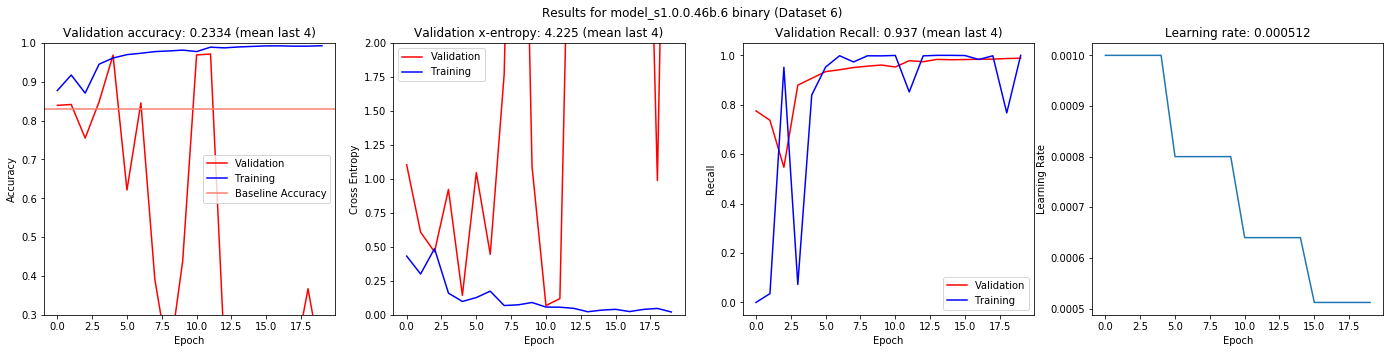

In [2]:
plot_metrics("model_s1.0.0.46b.6", classification="binary", dataset=6)

The model above had a checkpoint saved at 10 epochs. The checkpoint was reloaded and retrained for binary classification on Dataset 8 for an additional 10 epochs:

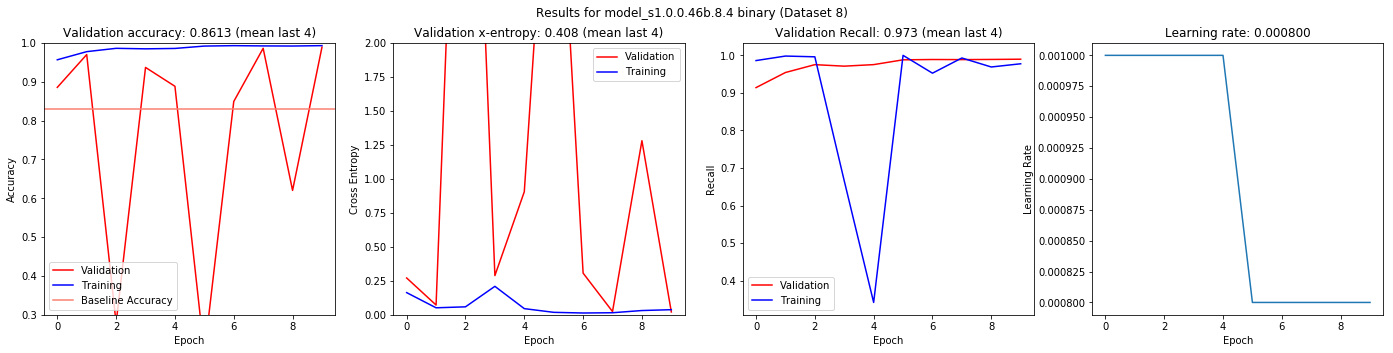

In [4]:
plot_metrics("model_s1.0.0.46b.8.4", classification="binary", dataset=8, model_dir="model_s1.0.0.46b.6")

## model_s0.0.2.02b

 - Binary classification
 - Trained on dataset 8 for 32 epochs
 - Results were unstable and dropped off precipitously towards the end of training, training should have stopped at epoch 25

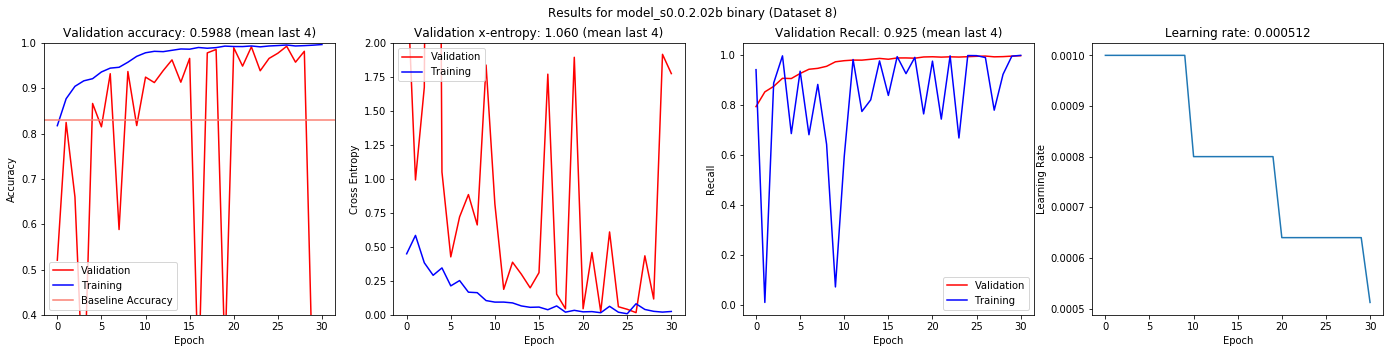

In [8]:
plot_metrics("model_s0.0.2.02b", classification="binary", dataset=8)

# Baselines

While these models were customized, the architectures are well-known ConvNets which should provide a reasonable baseline to compare out custom models against.

## vgg_16.3.04b.9

 - Binary classification
 - Customized version of VGG-16 trained on dataset 9 for 30 epochs
 - Cross entropy weighted at 6

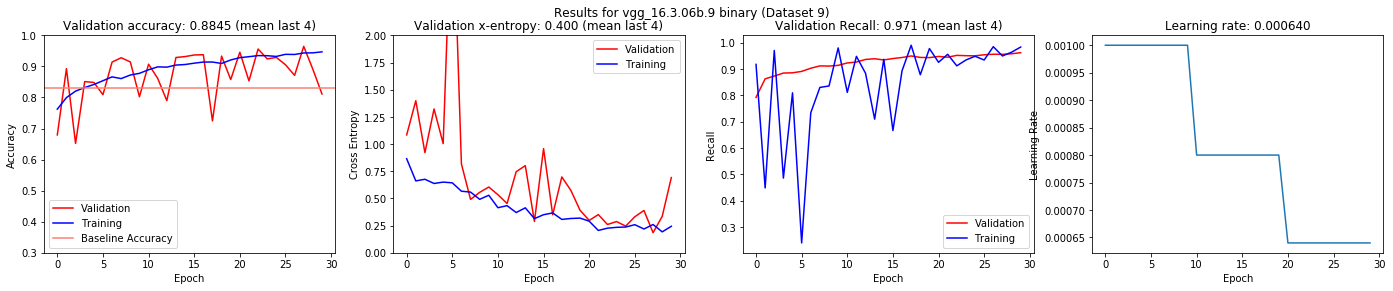

In [6]:
plot_metrics("vgg_16.3.06b.9", classification="binary", dataset=9)

## vgg_16.3.04l.6

 - Customized version of VGG-16 trained for multi-class classification on dataset 6 for 20 epochs
 - Cross entropy weighted at 2
 - Never really exceeded baseline accuracy

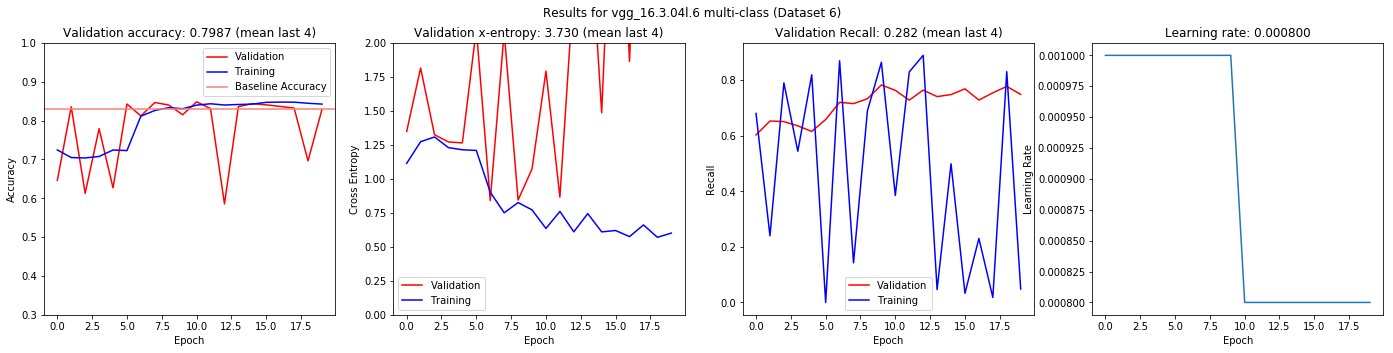

In [3]:
plot_metrics("vgg_16.3.04l.6", classification="multi-class", dataset=6)